<a href="https://colab.research.google.com/github/zhrvdt77/Neurons_synapses/blob/main/Correlations/ACF_and_corr_coef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import math
import statistics as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from matplotlib import cm, ticker # matplotlib's color map library
import pandas as pd

(0.0, 1.0)

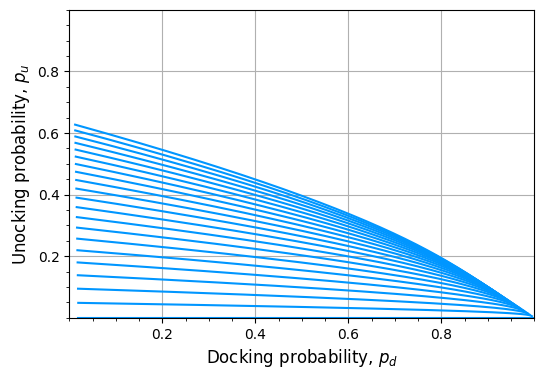

In [ ]:
f = 50

plt.figure(figsize=(6,4))
pdvect = []

for ku in np.linspace(0,50,21):
    for kd in np.arange(1,500):
        #print(kd)
        pu = ku / (kd + ku) * (1 - np.exp(-(kd + ku) / f))
        p_d = kd / (kd + ku)*(1 - np.exp(-(kd + ku) / f))
        pdvect.append([p_d, pu, kd, ku])

data = pd.DataFrame(pdvect, columns=['p_d', 'pu', 'kd', 'ku'])


for j in np.linspace(0,50,21):
    plt.plot(data[data.ku==j].p_d,data[data.ku==j].pu,c='#0096FF')
    #print(j)
    plt.xlabel(r'Docking probability, $p_d$',fontsize=12)
    plt.ylabel(r'Unocking probability, $p_u$',fontsize=12)
plt.grid()
major_ticks = [.2,.4,.6,.8]
minor_ticks =np.linspace(0,1,21)
plt.xticks(major_ticks)
plt.xticks(minor_ticks, minor=True)
plt.yticks(major_ticks)
plt.yticks(minor_ticks, minor=True)
plt.xlim([0,1])
plt.ylim([0,1])

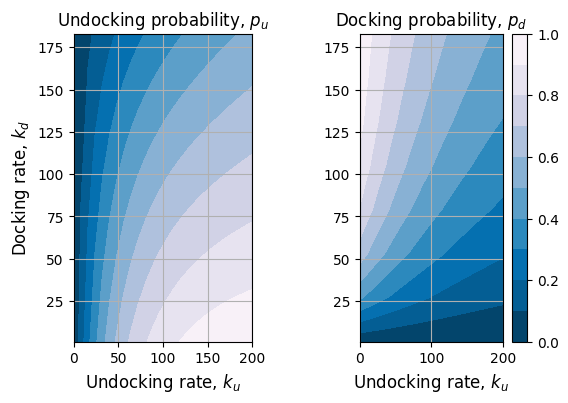

In [ ]:
f = 50

fig, ax = plt.subplots(1,2,figsize=(6,4))
plt.subplots_adjust(wspace=0.6)

pdvect = []

for ku in np.linspace(0,200,26):
    for kd in np.arange(1,201,26):
        #print(kd)
        pu = ku / (kd + ku) * (1 - np.exp(-(kd + ku) / f))
        p_d = kd / (kd + ku)*(1 - np.exp(-(kd + ku) / f))
        pdvect.append([p_d, pu, kd, ku])

data = pd.DataFrame(pdvect, columns=['p_d', 'pu', 'kd', 'ku'])



x1, y1 = np.meshgrid(data.ku,data.kd)
contour=ax[0].contourf(x1, y1,x1 / (y1 + x1) * (1 - np.exp(-(x1 + y1) / f)),levels=np.linspace(0, 1, 11),cmap=cm.PuBu_r)
contour1=ax[1].contourf(x1, y1,y1 / (y1 + x1) * (1 - np.exp(-(x1 + y1) / f)),levels=np.linspace(0, 1, 11),cmap=cm.PuBu_r)



ax[0].set_xlabel(r'Undocking rate, $k_u$',fontsize=12)
ax[0].set_ylabel(r'Docking rate, $k_d$',fontsize=12)
#cbar=ax[1].set_colorbar(contour, label=r'Undocking probability, $p_u$')
ax[0].set_title(r'Undocking probability, $p_u$',fontsize=12)
ax[0].grid()



ax[1].set_xlabel(r'Undocking rate, $k_u$',fontsize=12)
ax[1].set_title(r'Docking probability, $p_d$',fontsize=12)
cbar=plt.colorbar(contour1)
ax[1].grid()
plt.show()

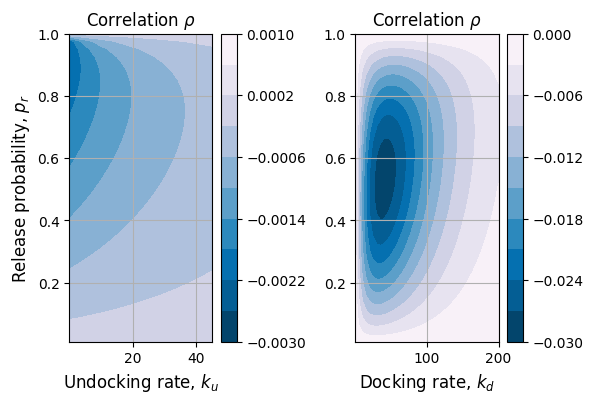

In [3]:
f = 50


fig, ax = plt.subplots(1,2,figsize=(6,4))
plt.subplots_adjust(wspace=0.6)
pdvect = []

ku_v=np.linspace(.1,45,41)
kd_v=np.linspace(1,200,41)
pr_v=np.linspace(0.01,1,41)
        #print(kd)


kd=300
#M=400;



x1, y1 = np.meshgrid(ku_v,pr_v)
pu_v = x1 / (kd + x1) * (1 - np.exp(-(kd+ x1) / f))
p_d = kd / (kd + x1)*(1 - np.exp(-(kd + x1) / f))
#r=M*(p_d**2)*(y1**2)* (M-(1-y1)*(1-p_d-pu_v))/(p_d *(1-y1)+y1*(1-pu_v)+pu_v)**2
r=-(p_d*(1-y1)*y1*(1-p_d-pu_v)/(-2* p_d *y1 -y1 *pu_v +y1 +p_d +pu_v))
contour=ax[0].contourf(x1, y1,r,levels=np.linspace(-.003, .001, 11),cmap=cm.PuBu_r)
cbar=plt.colorbar(contour)


ku=40
x2, y2 = np.meshgrid(kd_v,pr_v)
pu = ku / (ku + x2) * (1 - np.exp(-(ku+ x2) / f))
p_d_v = x2 / (ku + x2)*(1 - np.exp(-(ku + x2) / f))
#r=M*(p_d**2)*(y1**2)* (M-(1-y1)*(1-p_d-pu_v))/(p_d *(1-y1)+y1*(1-pu_v)+pu_v)**2
r2=-(p_d_v*(1-y2)*y2*(1-p_d_v-pu)/(-2* p_d_v *y2 -y2 *pu +y2 +p_d_v +pu))

#x2, y2 = np.meshgrid(kd_v,pr_v)
contour1=ax[1].contourf(x2, y2,r2,levels=np.linspace(-.03, 0, 11),cmap=cm.PuBu_r)


ax[0].set_xlabel(r'Undocking rate, $k_u$',fontsize=12)
ax[0].set_ylabel(r'Release probability, $p_r$',fontsize=12)
#cbar=ax[1].set_colorbar(contour, label=r'Undocking probability, $p_u$')
ax[0].set_title(r'Correlation $\rho$',fontsize=12)
ax[0].grid()



ax[1].set_xlabel(r'Docking rate, $k_d$',fontsize=12)
ax[1].set_title(r'Correlation $\rho$',fontsize=12)
cbar=plt.colorbar(contour1)
ax[1].grid()
plt.show()